In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/housing.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [ ]:
df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

id                          0.000000
url                         0.000000
region                      0.000000
region_url                  0.000000
price                       0.000000
type                        0.000000
sqfeet                      0.000000
beds                        0.000000
baths                       0.000000
cats_allowed                0.000000
dogs_allowed                0.000000
smoking_allowed             0.000000
wheelchair_access           0.000000
electric_vehicle_charge     0.000000
comes_furnished             0.000000
laundry_options            20.527460
parking_options            36.544261
image_url                   0.000000
description                 0.000520
lat                         0.498212
long                        0.498212
state                       0.000000
dtype: float64

In [ ]:
df["laundry_options"]=df["laundry_options"].fillna(df["laundry_options"].mode()[0])
df["parking_options"]=df["parking_options"].fillna(df["parking_options"].mode()[0])
df['lat'] = df['lat'].fillna(df['lat'].mean())
df['long'] = df['long'].fillna(df['long'].mean())
df.fillna(0, inplace=True)

In [ ]:
df.laundry_options.value_counts()

laundry_options
w/d in unit           210809
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: count, dtype: int64

In [ ]:
df.parking_options.value_counts()

parking_options
off-street parking    269189
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: count, dtype: int64

In [ ]:
df.region.value_counts()

region
jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: count, Length: 404, dtype: int64

In [ ]:
df.type.value_counts()

type
apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: count, dtype: int64

In [ ]:
df.baths.value_counts()

baths
1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: count, dtype: int64

In [ ]:
df.beds.value_counts()

beds
2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: count, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,384977.0,7.040982e+09,8.800376e+06,7.003808e+09,7.035979e+09,7.043320e+09,7.048426e+09,7.051292e+09
price,384977.0,8.825722e+03,4.462200e+06,0.000000e+00,8.050000e+02,1.036000e+03,1.395000e+03,2.768307e+09
sqfeet,384977.0,1.059900e+03,1.915076e+04,0.000000e+00,7.500000e+02,9.490000e+02,1.150000e+03,8.388607e+06
beds,384977.0,1.905345e+00,3.494572e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03
baths,384977.0,1.480718e+00,6.180605e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01
cats_allowed,384977.0,7.268902e-01,4.455574e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
dogs_allowed,384977.0,7.079176e-01,4.547206e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
smoking_allowed,384977.0,7.317710e-01,4.430381e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
wheelchair_access,384977.0,8.211140e-02,2.745347e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
electric_vehicle_charge,384977.0,1.287090e-02,1.127177e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Text(0.5, 1.0, 'Relation between type and price')

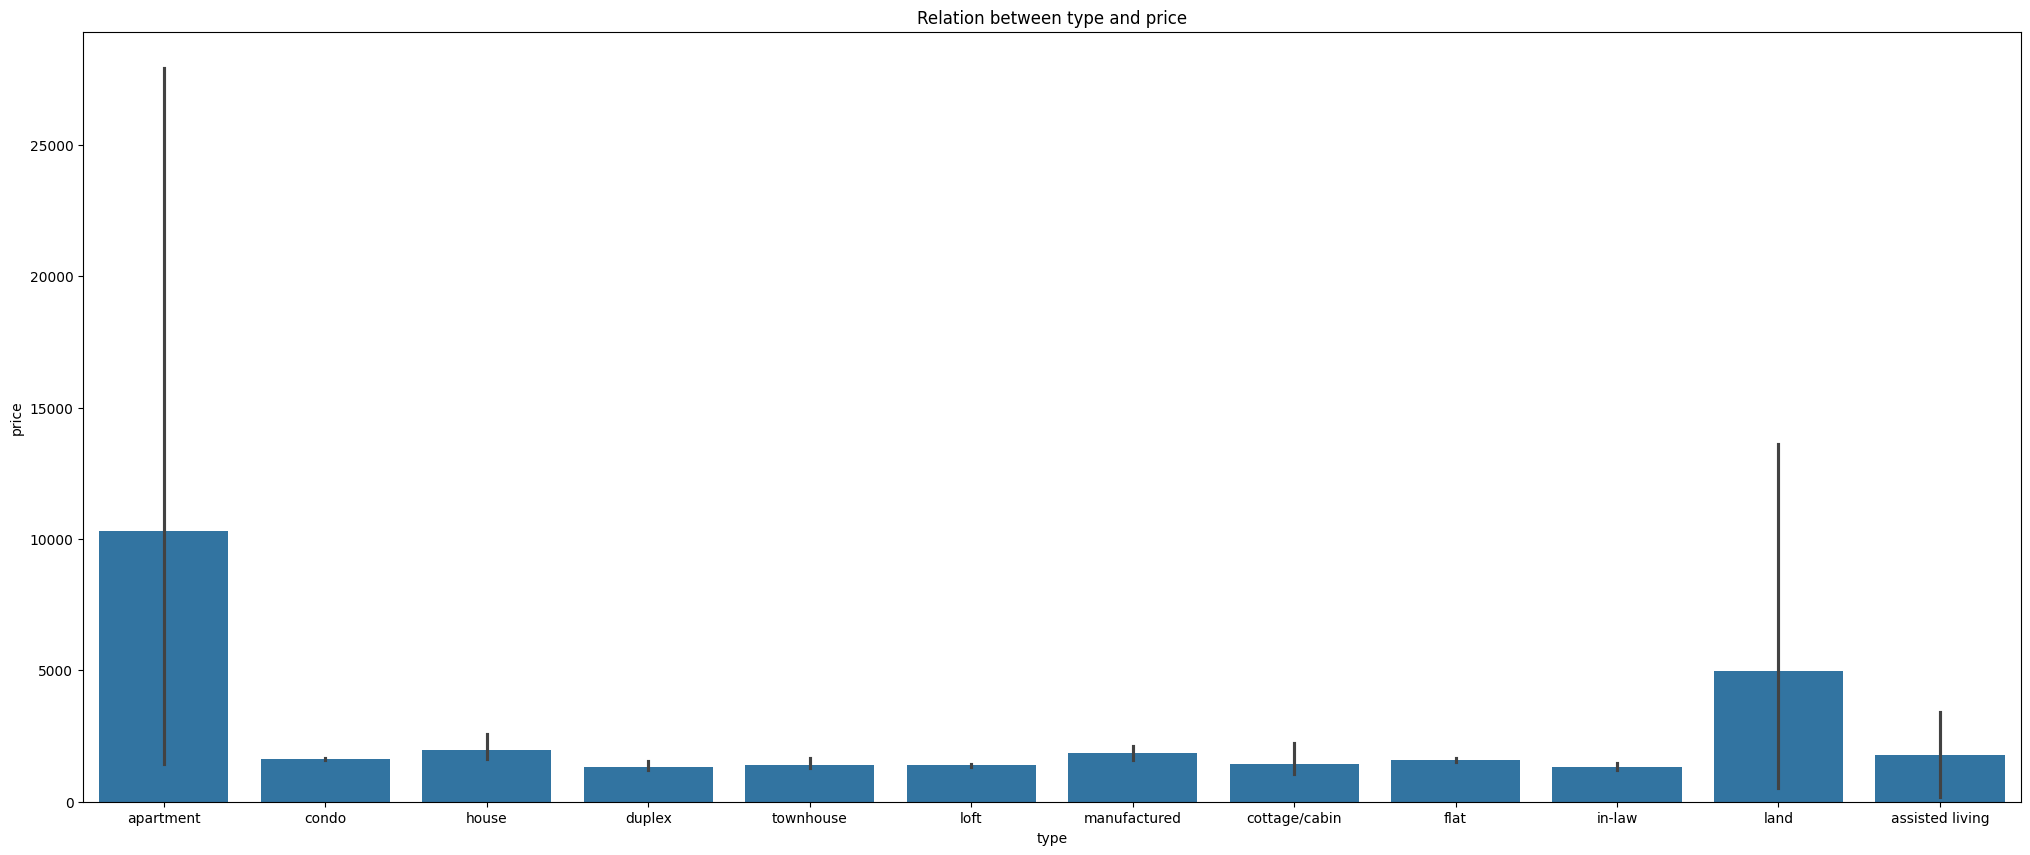

In [ ]:
sns.barplot(x=df["type"],y=df["price"])
fig= plt.gcf()
fig.set_size_inches(25,10)
plt.title('Relation between type and price')

Text(0.5, 1.0, 'Relation between parking option and price')

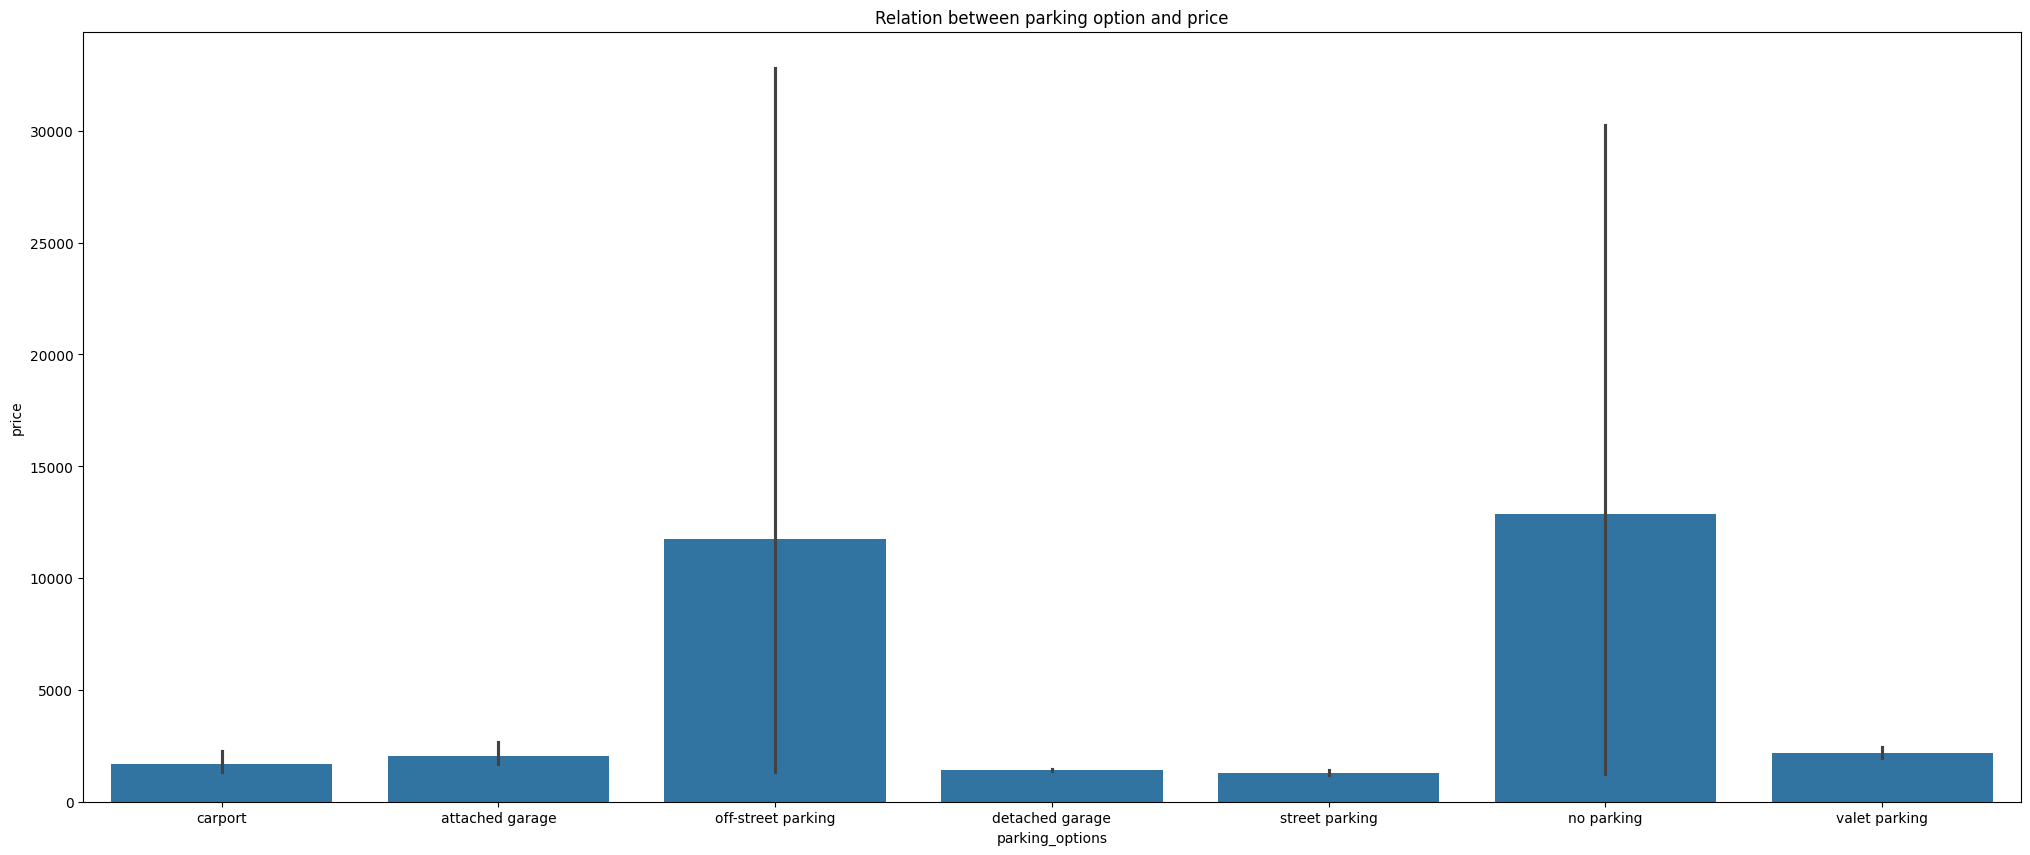

In [ ]:
sns.barplot(x=df["parking_options"],y=df["price"])
fig1 = plt.gcf()
fig1.set_size_inches(25,10)
plt.title('Relation between parking option and price')

Text(0.5, 1.0, 'Relation in dogs allowed and price')

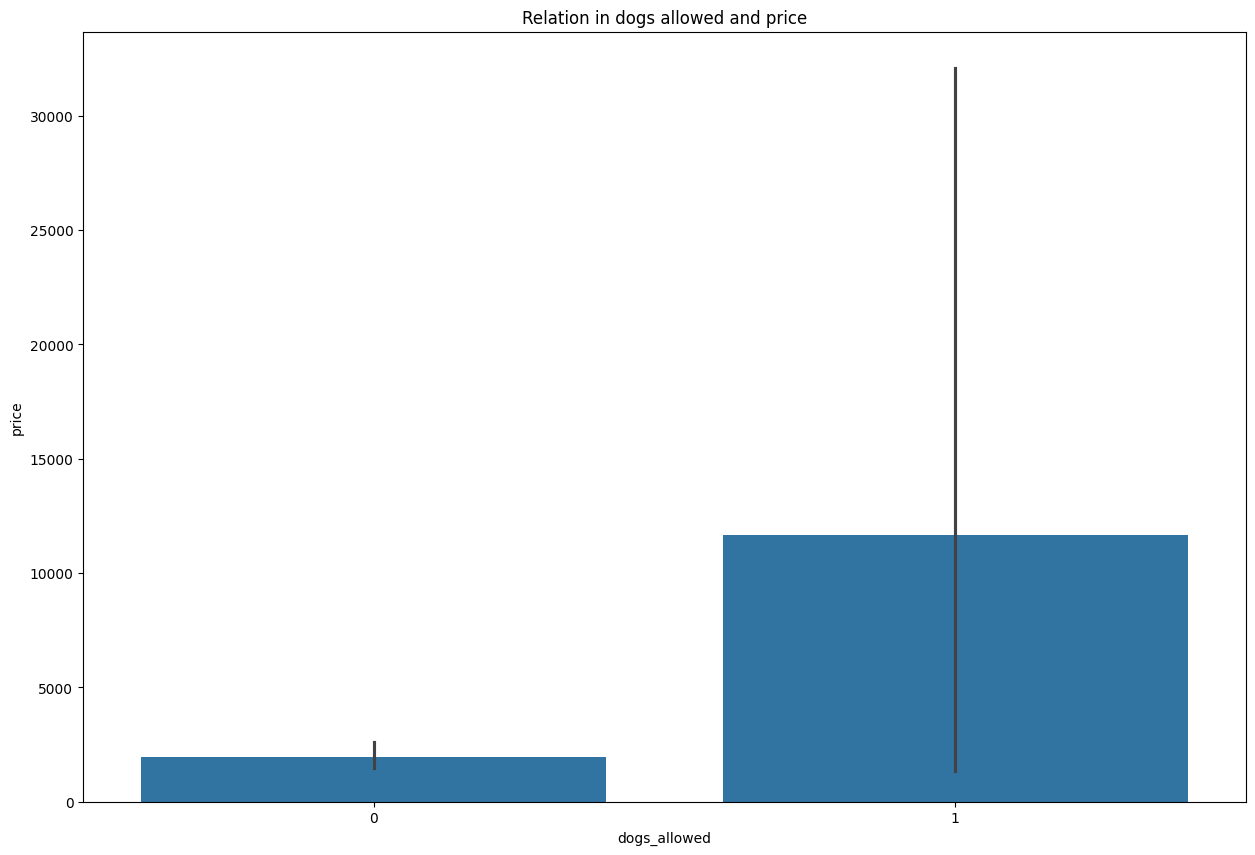

In [ ]:
sns.barplot(x=df["dogs_allowed"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Relation in dogs allowed and price')

Text(0.5, 1.0, 'Relation in laundry options and price')

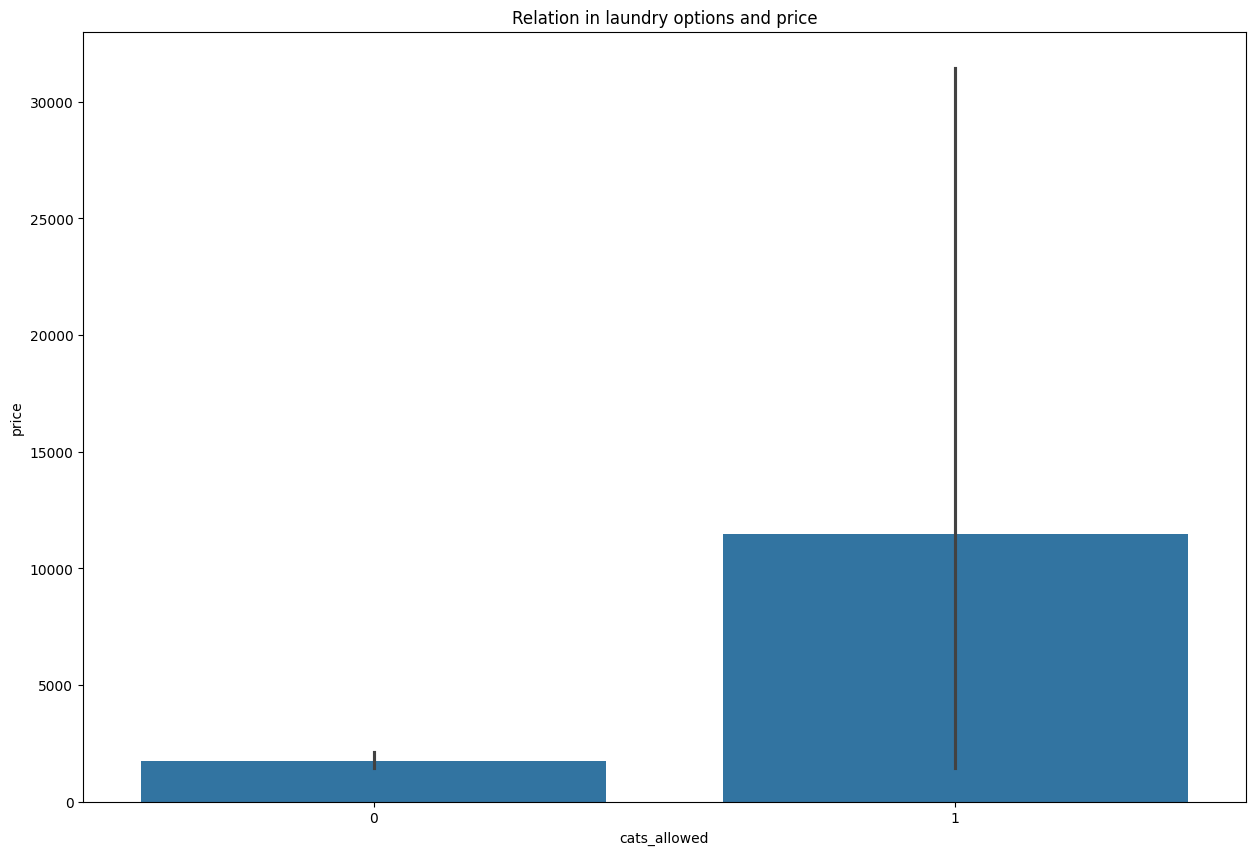

In [ ]:
sns.barplot(x=df["cats_allowed"],y=df["price"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Relation in laundry options and price')

Text(0.5, 1.0, 'Relation between laundry option and price')

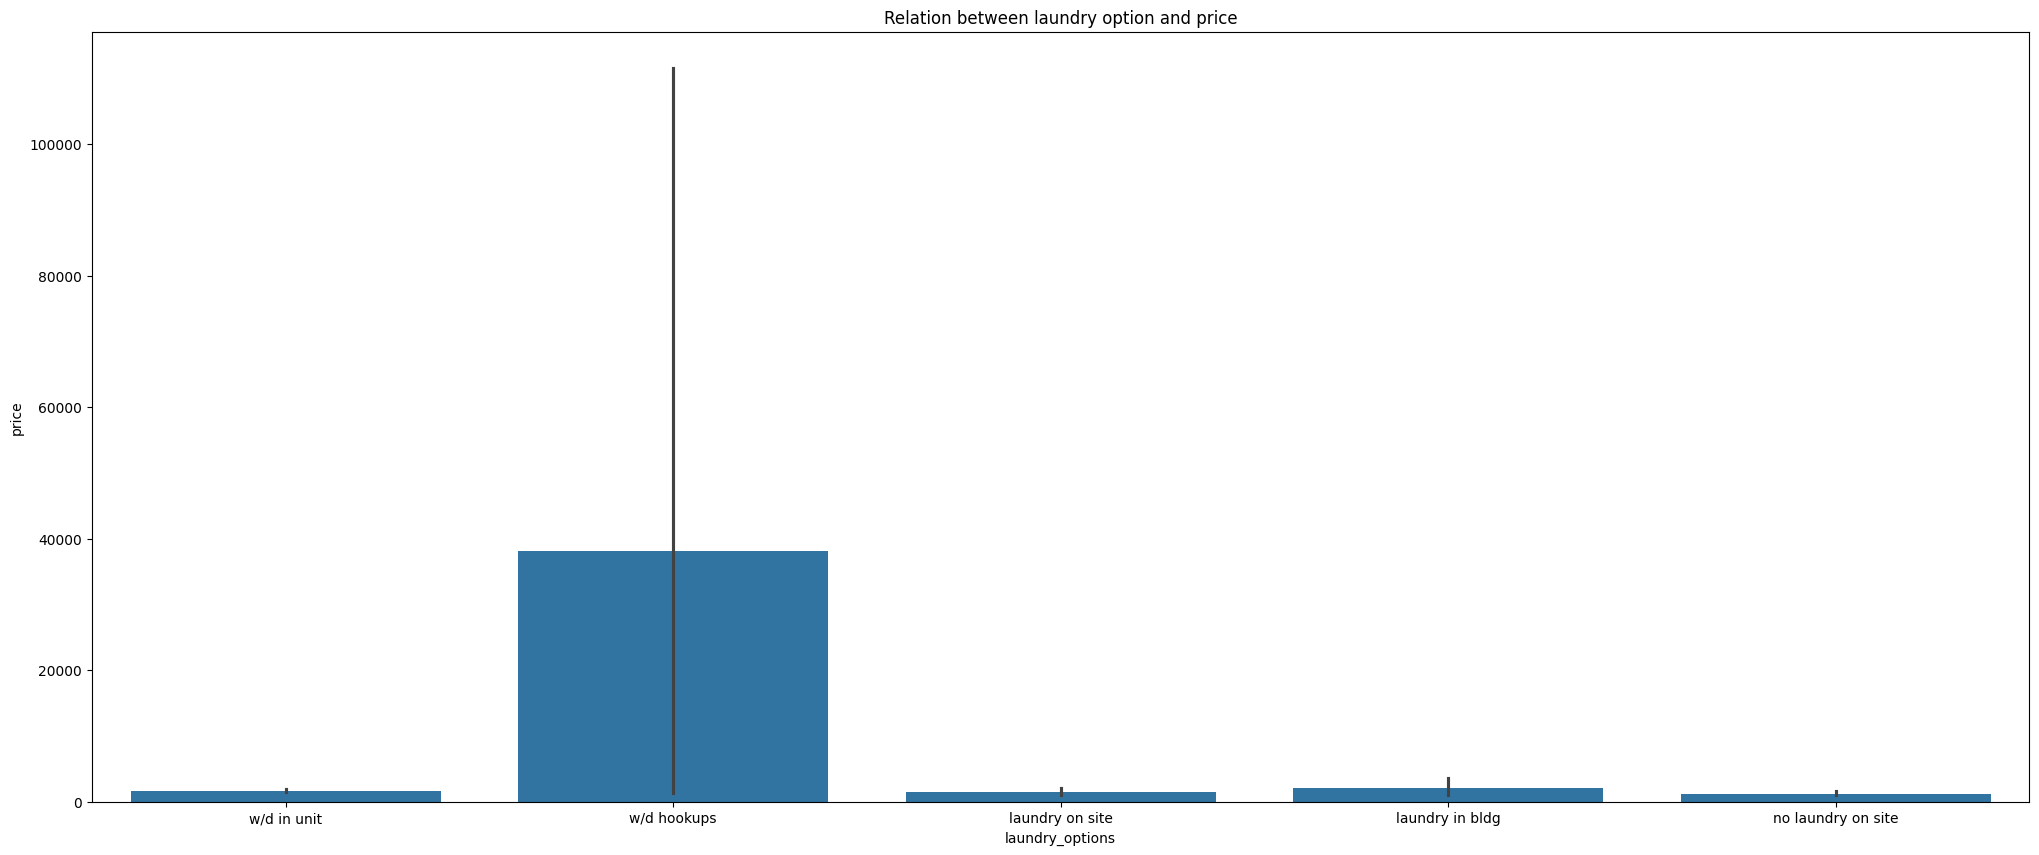

In [ ]:
sns.barplot(x=df["laundry_options"],y=df["price"])
fig1 = plt.gcf()
fig1.set_size_inches(25,10)
plt.title('Relation between laundry option and price')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'sqfeet'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'cats_allowed'}>,
        <Axes: title={'center': 'dogs_allowed'}>,
        <Axes: title={'center': 'smoking_allowed'}>],
       [<Axes: title={'center': 'wheelchair_access'}>,
        <Axes: title={'center': 'electric_vehicle_charge'}>,
        <Axes: title={'center': 'comes_furnished'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

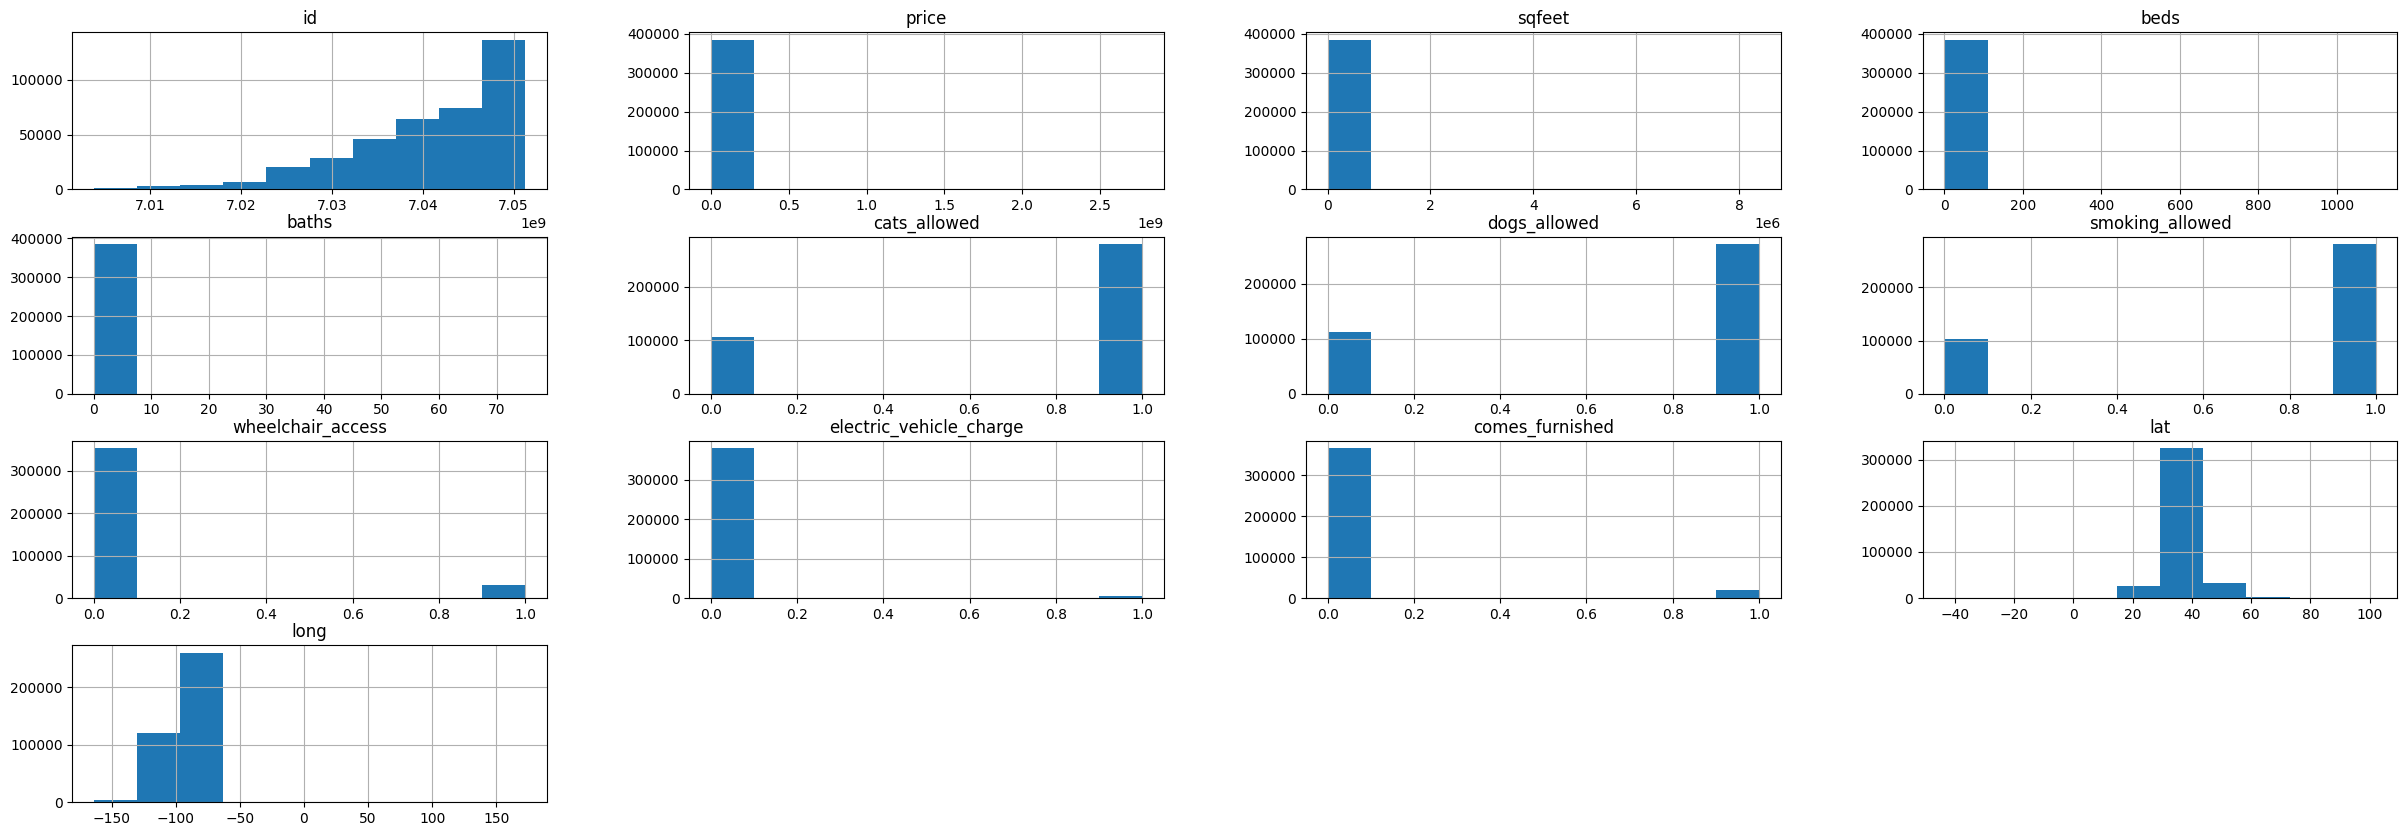

In [ ]:
df.hist(figsize=(30,10))

In [ ]:
df=df[df["price"]<5000]


<Axes: xlabel='sqfeet', ylabel='price'>

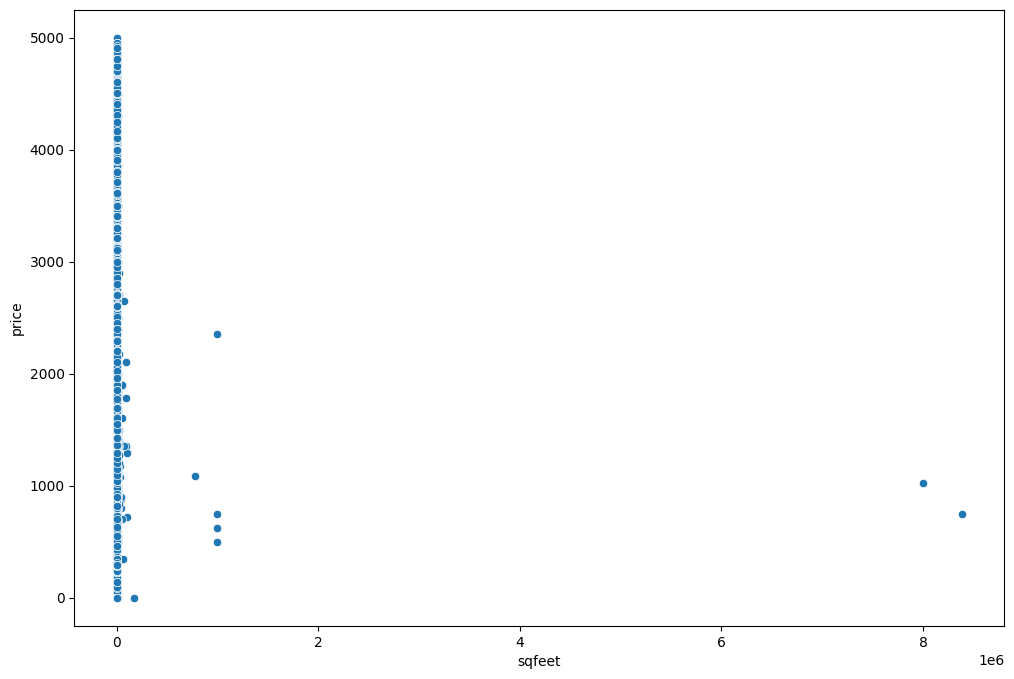

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="sqfeet", y="price")

In [ ]:
df=df[df["sqfeet"]<4000]

<Axes: xlabel='sqfeet', ylabel='price'>

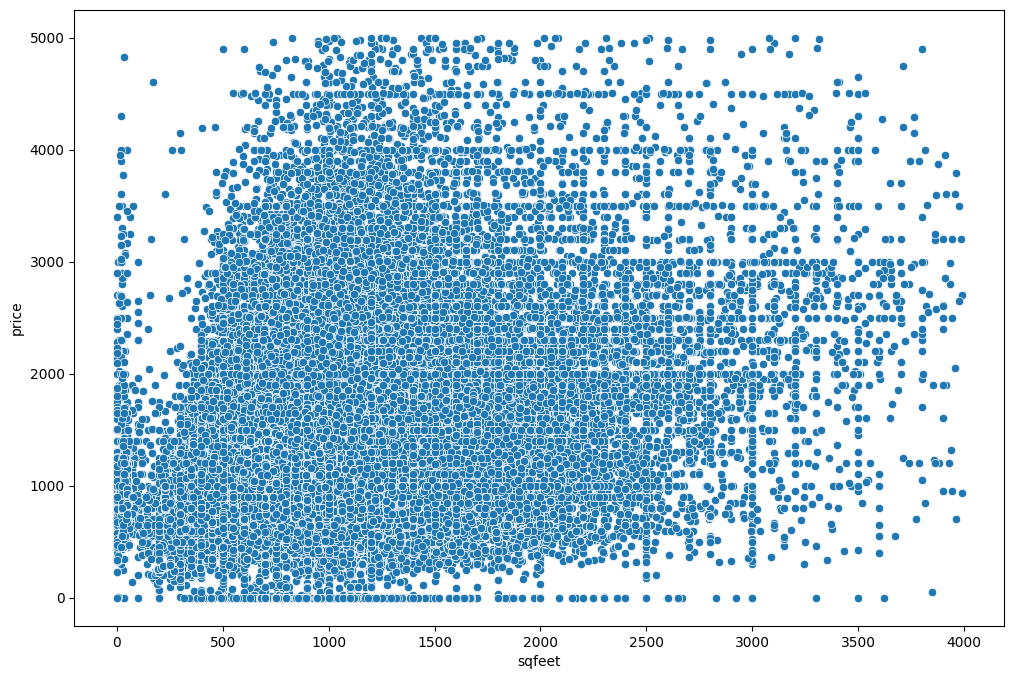

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="sqfeet", y="price")

<Axes: xlabel='beds', ylabel='price'>

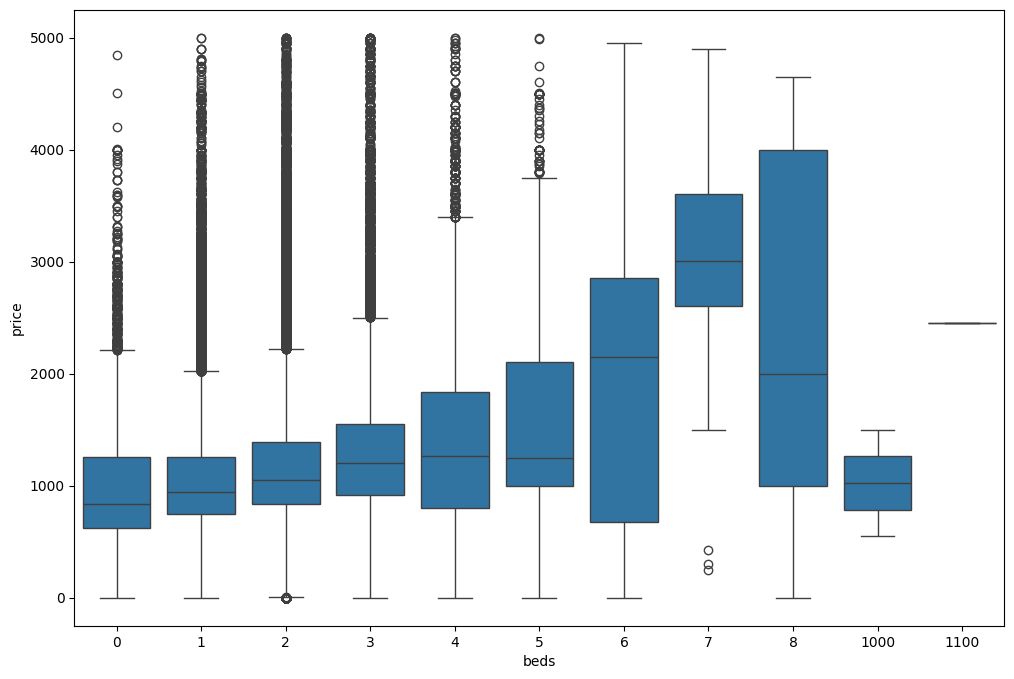

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="beds", y="price")

In [ ]:
df=df[df["beds"]<=4]

<Axes: xlabel='beds', ylabel='price'>

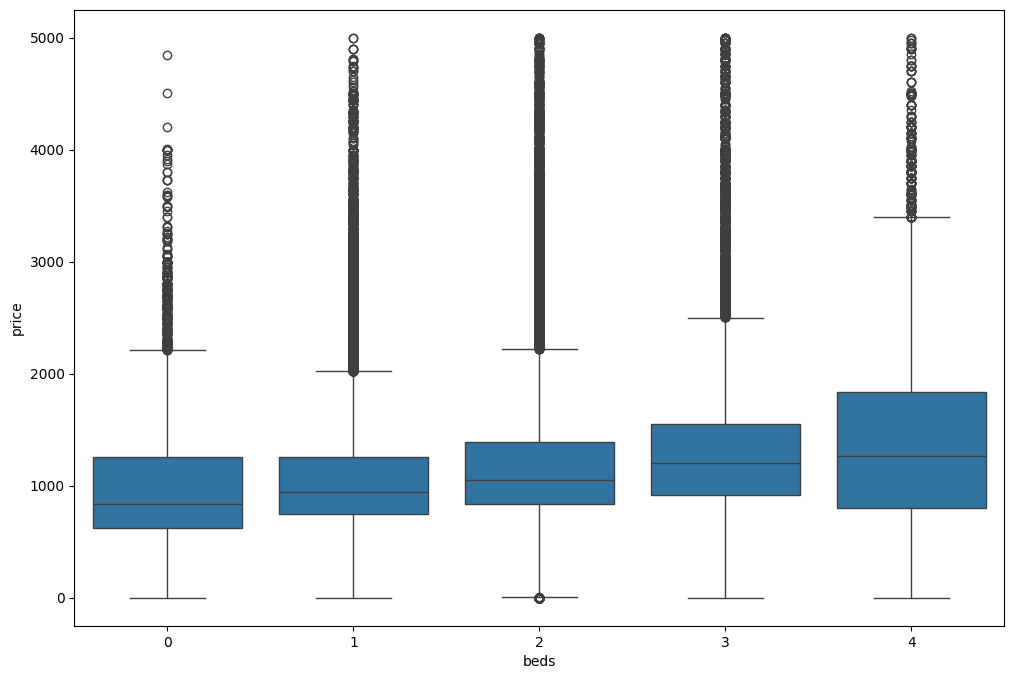

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="beds", y="price")

In [ ]:
df=df[df["baths"]<7.5]

<Axes: xlabel='baths', ylabel='price'>

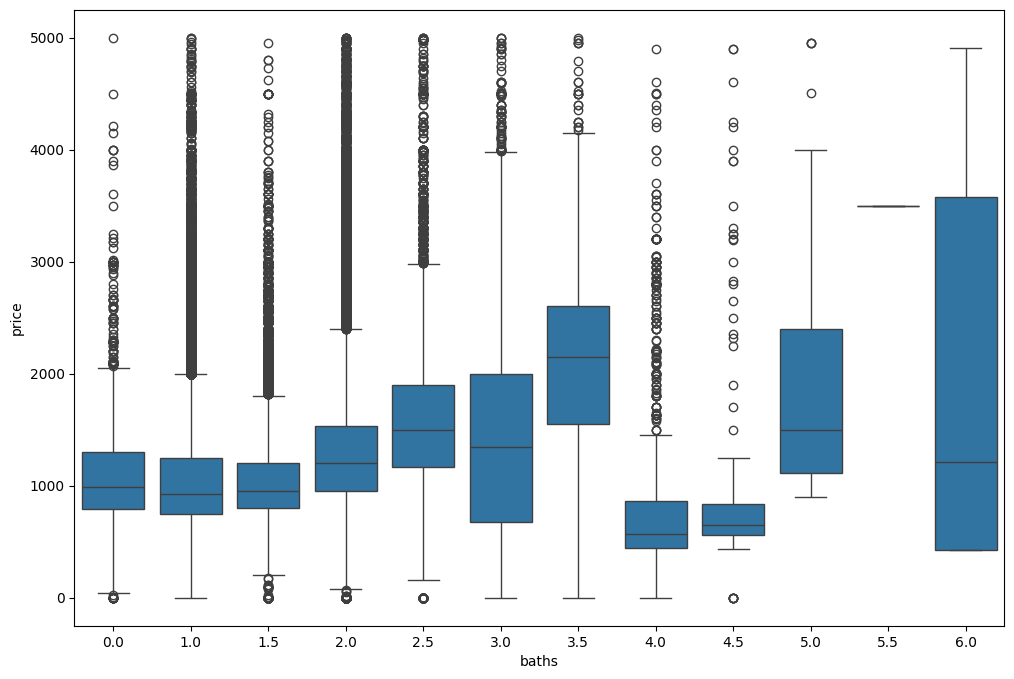

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="baths", y="price")

In [ ]:

df.drop(columns=["id", "url", "region_url", "image_url",
                 "description"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["state"]=le.fit_transform(df["state"])
df["region"]=le.fit_transform(df["region"])
df["laundry_options"]=le.fit_transform(df["laundry_options"])
df["parking_options"]=le.fit_transform(df["parking_options"])
df["type"]=le.fit_transform(df["type"])

In [ ]:
correlation = df[["region", "state", "price"]].corr()["price"].reset_index()
correlation_sorted = correlation.sort_values("price", ascending=False)
correlation_filtered = correlation_sorted[(correlation_sorted['index'] == 'region') | (correlation_sorted['index'] == 'state')]
fig = px.bar(correlation_filtered, x="index", y="price", title="Correlation of 'region' and 'state' with 'price'")
fig.update_layout(
    width=800,  # Specify the width of the figure
    height=600,  # Specify the height of the figure
)
fig.show()

In [ ]:
df.drop("state", axis=1, inplace=True)

<Axes: >

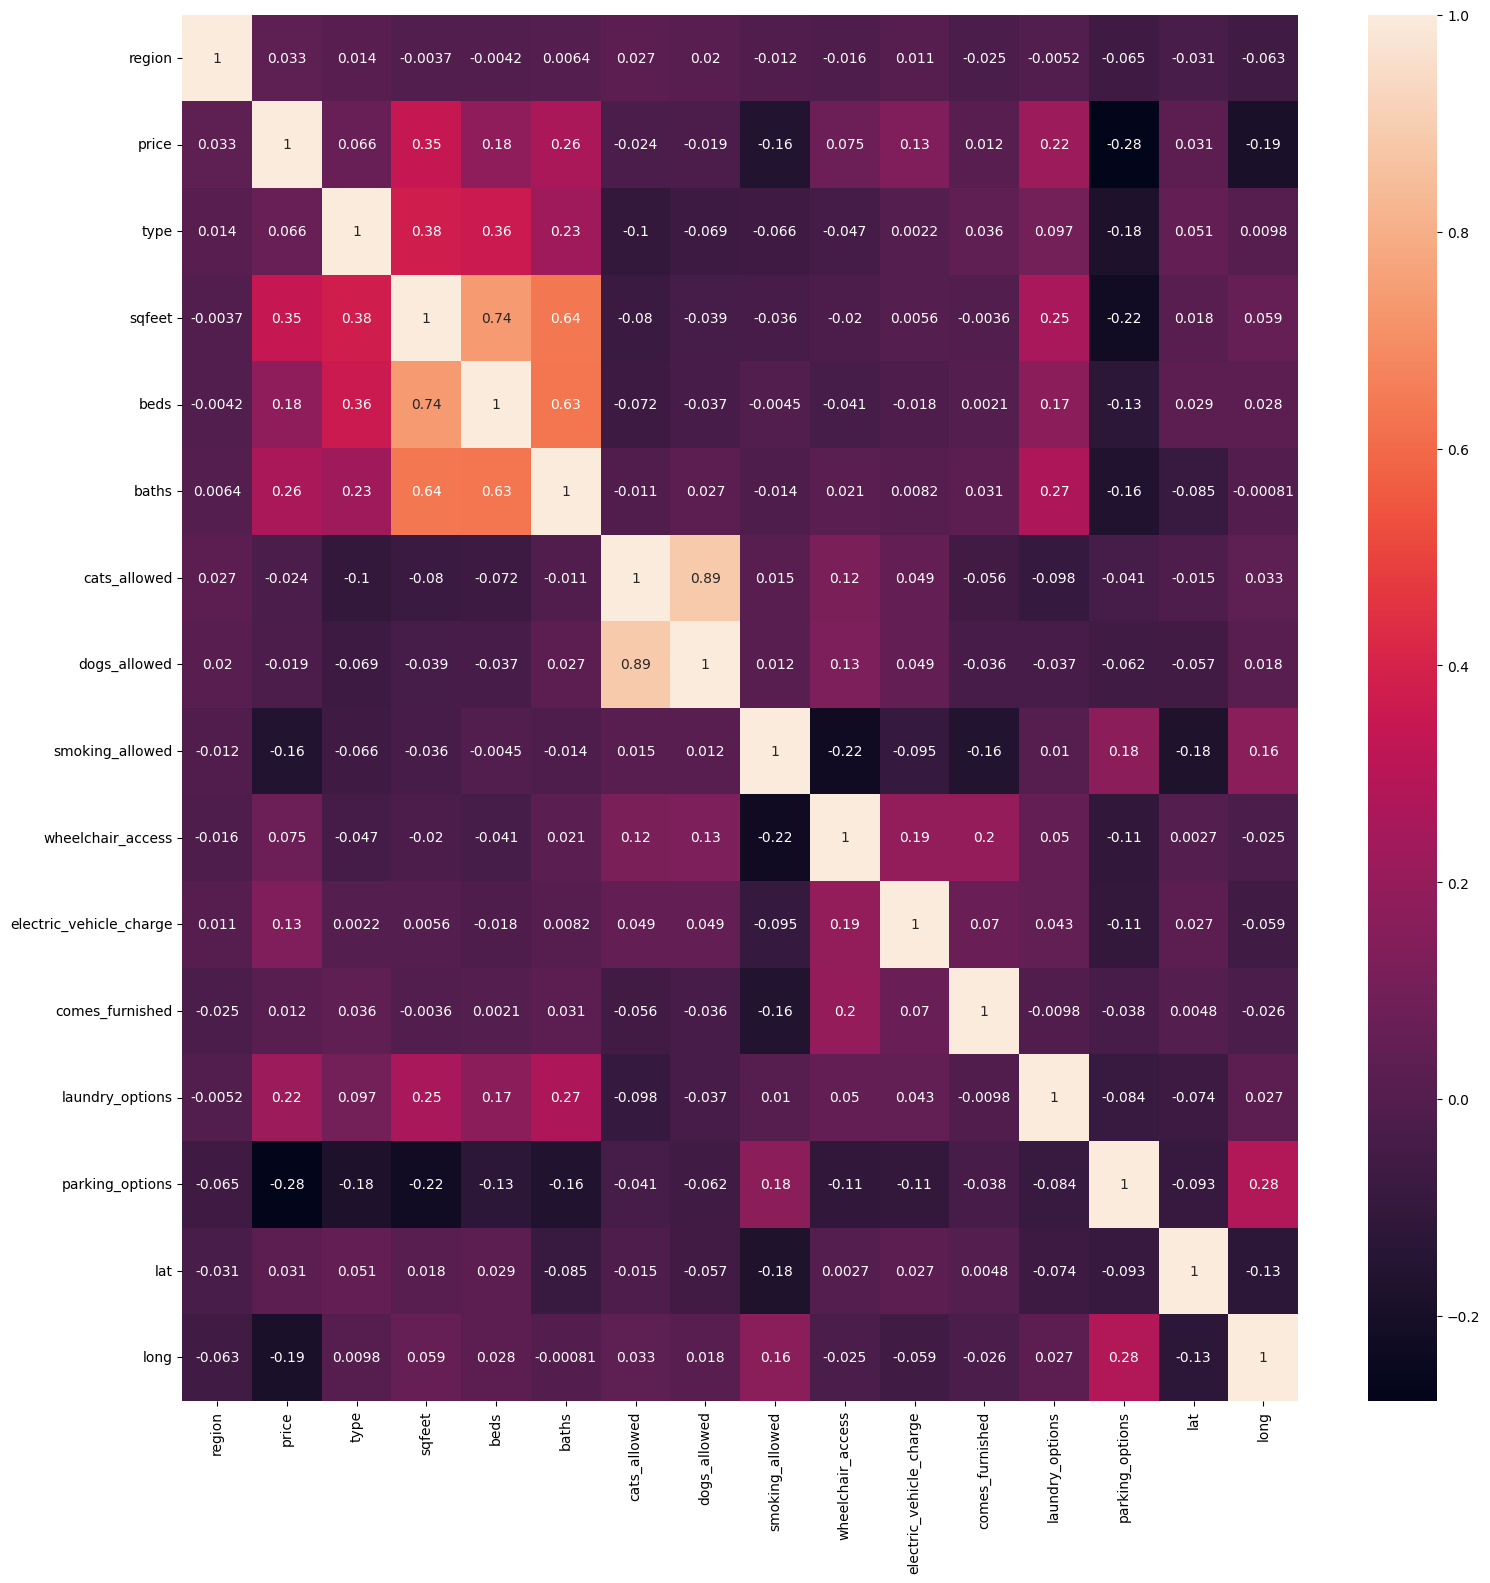

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# CREATING FEATURE MATRIX AND TARGET VECTOR :
# X : FEATURE MATRIX
# Y : TARGET VECTOR


y=df["price"]
x=df.drop("price", axis=1)

In [ ]:
# SPLITTING DATASET INTO TRAINING AND TESTING DATA :


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
#  LINEAR REGRESSION

from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
lr_r2=metrics.r2_score(y_test, y_pred)
lr_MSE=metrics.mean_squared_error(y_test, y_pred)
lr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("R^2 Score:", lr_r2)
print("MSE Score:", lr_MSE)
print("RMSE Score:", lr_RMSE)


R^2 Score: 0.24269092005494675
MSE Score: 225320.22902871412
RMSE Score: 474.67908004115174


In [ ]:
pred_graph_lr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_lr

,True Values,Predicted Values
266179,1073,1239.025301
13021,3000,1245.978478
71857,895,1073.179566
50876,1480,1314.567703
310339,1100,1007.644534
...,...,...
212482,2080,980.011475
21982,1610,1320.040103
174723,725,1140.659050
165967,1355,1521.712324


In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

# Create an XGBoost Regressor
reg = XGBRegressor()

# Assume X_train, y_train, X_test, and y_test are already defined
# Train the model using the training sets
reg.fit(X_train, y_train)

# Predict on the test set
y_test_pred = reg.predict(X_test)

# Calculate metrics
xgb_r2 = metrics.r2_score(y_test, y_test_pred)
xgb_MSE = metrics.mean_squared_error(y_test, y_test_pred)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', xgb_r2)
print('MSE:', xgb_MSE)
print('RMSE:', xgb_RMSE)

R^2: 0.7998067971397549
MSE: 59562.97040798066
RMSE: 244.0552609717329


In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

# Create an XGBoost Regressor
reg = XGBRegressor(colsample_bytree=0.7, learning_rate=0.3,
                   max_depth=20, alpha=15, n_estimators=12)

# Train the model using the training sets
reg.fit(X_train, y_train)


y_test_pred = reg.predict(X_test)


xgb_r2 = metrics.r2_score(y_test, y_test_pred)
xgb_MAE =  metrics.mean_absolute_error(y_test, y_test_pred)
xgb_MSE = metrics.mean_squared_error(y_test, y_test_pred)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', xgb_r2)
print('MAE:',xgb_MAE)
print('MSE:', xgb_MSE)
print('RMSE:', xgb_RMSE)

R^2: 0.8591917250216776
MAE: 95.93062112790415
MSE: 41894.32506151345
RMSE: 204.68103249083305


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

# Define the parameter grid
param_grid = {
    'colsample_bytree': [0.6, 0.7],
    'learning_rate': [0.1, 0.01],
    'max_depth': [10, 15,20],
    'n_estimators': [100, 150]
}

# Create an XGBoost regressor instance
xgb_reg = XGBRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
y_test_pred = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_r2 = metrics.r2_score(y_test, y_test_pred)
xgb_MAE =  metrics.mean_absolute_error(y_test, y_test_pred)
xgb_MSE = metrics.mean_squared_error(y_test, y_test_pred)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

# Print evaluation metrics
print('R^2:', xgb_r2)
print('MAE:', xgb_MAE)
print('MSE:', xgb_MSE)
print('RMSE:', xgb_RMSE)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}
R^2: 0.8891015714930446
MAE: 84.99597845316612
MSE: 32995.325121315924
RMSE: 181.6461536100226


In [ ]:
pred_graph_xgb=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_xgb

,True Values,Predicted Values
266179,1073,1239.025301
13021,3000,1245.978478
71857,895,1073.179566
50876,1480,1314.567703
310339,1100,1007.644534
...,...,...
212482,2080,980.011475
21982,1610,1320.040103
174723,725,1140.659050
165967,1355,1521.712324


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_test_pred = gbr.predict(X_test)

acc_gbr = metrics.r2_score(y_test, y_test_pred)
gbr_MAE = metrics.mean_absolute_error(y_test, y_test_pred)
gbr_MSE = metrics.mean_squared_error(y_test, y_test_pred)
gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_gbr)

R^2: 0.633065985504923


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.3,
                   max_depth=20, alpha=0.9, n_estimators=100)




gbr.fit(X_train,y_train)
y_test_pred = gbr.predict(X_test)

acc_gbr = metrics.r2_score(y_test, y_test_pred)
gbr_MAE = metrics.mean_absolute_error(y_test, y_test_pred)
gbr_MSE = metrics.mean_squared_error(y_test, y_test_pred)
gbr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('R^2:', acc_gbr)
print('MAE:', gbr_MAE)
print('MSE:',gbr_MSE)
print('RMSE:',gbr_RMSE)

R^2: 0.8642576254552543
MAE: 77.71577093774444
MSE: 40387.08069305433
RMSE: 200.96537187549086


In [ ]:
pred_graph_gbr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_gbr

,True Values,Predicted Values
266179,1073,1239.025301
13021,3000,1245.978478
71857,895,1073.179566
50876,1480,1314.567703
310339,1100,1007.644534
...,...,...
212482,2080,980.011475
21982,1610,1320.040103
174723,725,1140.659050
165967,1355,1521.712324


In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()
ran.fit(X_train, y_train)
y_pred= ran.predict(X_test)
ran_r2=metrics.r2_score(y_test, y_pred)
ran_MSE=metrics.mean_squared_error(y_test, y_pred)
ran_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print("R^2 Score:", ran_r2)
print("MSE Score:", ran_MSE)
print("RMSE Score:", ran_RMSE)

R^2 Score: 0.8869669834363499
MSE Score: 33630.42363334129
RMSE Score: 183.38599628472534


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [ 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest regressor instance
rf_reg = RandomForestRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
rf_r2 = metrics.r2_score(y_test, y_pred)
rf_MSE = metrics.mean_squared_error(y_test, y_pred)
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print('R^2:', rf_r2)
print('MSE:', rf_MSE)
print('RMSE:', rf_RMSE)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
pred_graph_ran=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_ran

,True Values,Predicted Values
266179,1073,1032.856873
13021,3000,2731.766250
71857,895,895.000000
50876,1480,1622.359044
310339,1100,1027.702694
...,...,...
212482,2080,2050.034590
21982,1610,1793.799900
174723,725,786.163333
165967,1355,1398.123782


In [ ]:
models={"LR":[lr_r2, lr_MSE , lr_RMSE],
        "XGB":[xgb_r2, xgb_MSE, xgb_RMSE],"GBR":[acc_gbr, gbr_MSE , gbr_RMSE],
        "RAN":[ran_r2, ran_MSE , ran_RMSE],}; # Added semicolon here
models=pd.DataFrame(models)
models=models.rename(index={0:"R^2", 1:"MSE", 2:"RMSE"})
print(models)

                 LR           XGB           GBR           RAN
R^2        0.242691      0.859192      0.864258      0.886967
MSE   225320.229029  41894.325062  40387.080693  33630.423633
RMSE     474.679080    204.681032    200.965372    183.385996
